In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Veri bilimine başalayanların  elini kirlettiği dataset olan titanic verisini pd.read_csv diyerek csv dosyamı full path olarak localimden çağırıyorum..

In [2]:
data = pd.read_csv('titanic_dataset.csv', sep=",")
data.head() # Head fonksiyonuyla birlikte ilk 5 adet satıra göz gezdiriyorum.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


datamiz titanikte bulunan yolcuların bilgilerini ve hayatta kalıp kalmadıklarını gösteriyor.

In [3]:
data.tail() #son 5 adet satıra göz gezdiriyorum.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


İnfo fonksiyonu ile birlikte toplam satır ve sütun sayısını ve her bir sutunda null yani(boş olayan girdi sayısını) ayrıca her değişkenin veri tiplerinin int mı float mı object yani kategorik olup olmadığına göz atıyorum..

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Datamızdaki eksik değerlerlerin sayısını sıralıyarak görüntüledim.Bunun için isnull metodunu, sum metodu ekleyerek sayısını ardından sort_values ile bunları sıraladım..

In [5]:
data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Yolcuların gemiye nerede bindiğini gösteren bu değişkeni katagorilerinin nasıl dağıldığına bakalım.

In [6]:
data['Embarked'].value_counts() #her bir katogoride kaç değer olduğunu görüntülüyoruz.S de fazlaymış.


S    644
C    168
Q     77
Name: Embarked, dtype: int64

datamızdaki boş satırları silmek yerine(bilgi eksikliğine neden olmamak için) bu boşluğu genellikle başka değerlerle ki biz mod ile dolduralım.. #fillna 

In [7]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True) #en çok olan değerle doldurduk

Age kolonumuza baktığımızda numerik olduğundan mean veya medyan değerini kullanarak doldurayım.

In [8]:
data['Age'].mean()

29.69911764705882

In [9]:
data['Age'].median() #mean ve median birbirine yakın ben mean kullanıyorum.

28.0

In [10]:
data['Age'].fillna(data['Age'].mean(),inplace = True) #age kolonunu ortalama ile doldurdum.

In [11]:
data.isnull().sum() #Kalan eksik verime baktım onu da silicem cabin ayrımı yapmam gemi batarsa herkes ölür :) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

İsimlern baş haflerine göre hayatta kalmanın daha yüksek veya düşük olasılıklarından kurtulmak için name ve işime yaramayan ıd de yolladık gitti. #drop

In [12]:
data.drop(['Name','PassengerId','Cabin'],axis = 1,inplace= True)


In [13]:
data.isnull().sum() #Görüldüğü gibi boş değer kalmadı!

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
#istatistiksel analiz yapalım (mean,std min ve Q1,q2,q3 max min ve count değerleri vardır.)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [15]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


 **SEABORN İLE VERİ GÖRSELLEŞTİRME** İlk olarak barplot grafiğimizle başlayalım. Cinsiyete göre survived dağılımına bakalım,Yani cinsiyet değişkeninin sınıf frekanslarına baktığımda kadınların daha çok hayatta kaldığını görselden rahat bir şekilde analiz ediyorum

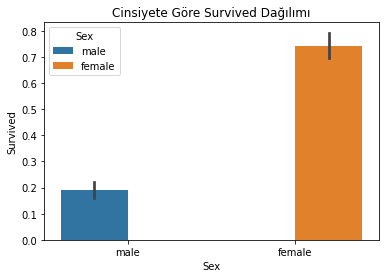

In [16]:
a=sns.barplot(x="Sex", y="Survived", hue="Sex", data=data); #hue dediğim kırılıma yani yeni boyut getirerek cinsiyet kırılması
a.set_title("Cinsiyete Göre Survived Dağılımı"); #başlık ekledim ve detaylar hariç olsun ; ü ekledim.

Pairplot, tüm veri setinde  sayısal değişkenler arasında  çift yönlü ilişkiler çizer,yani
# *PairPlot* : sürekli değişkenlerin özet grafiğidir. Bakalım nasıl bişiymişş..

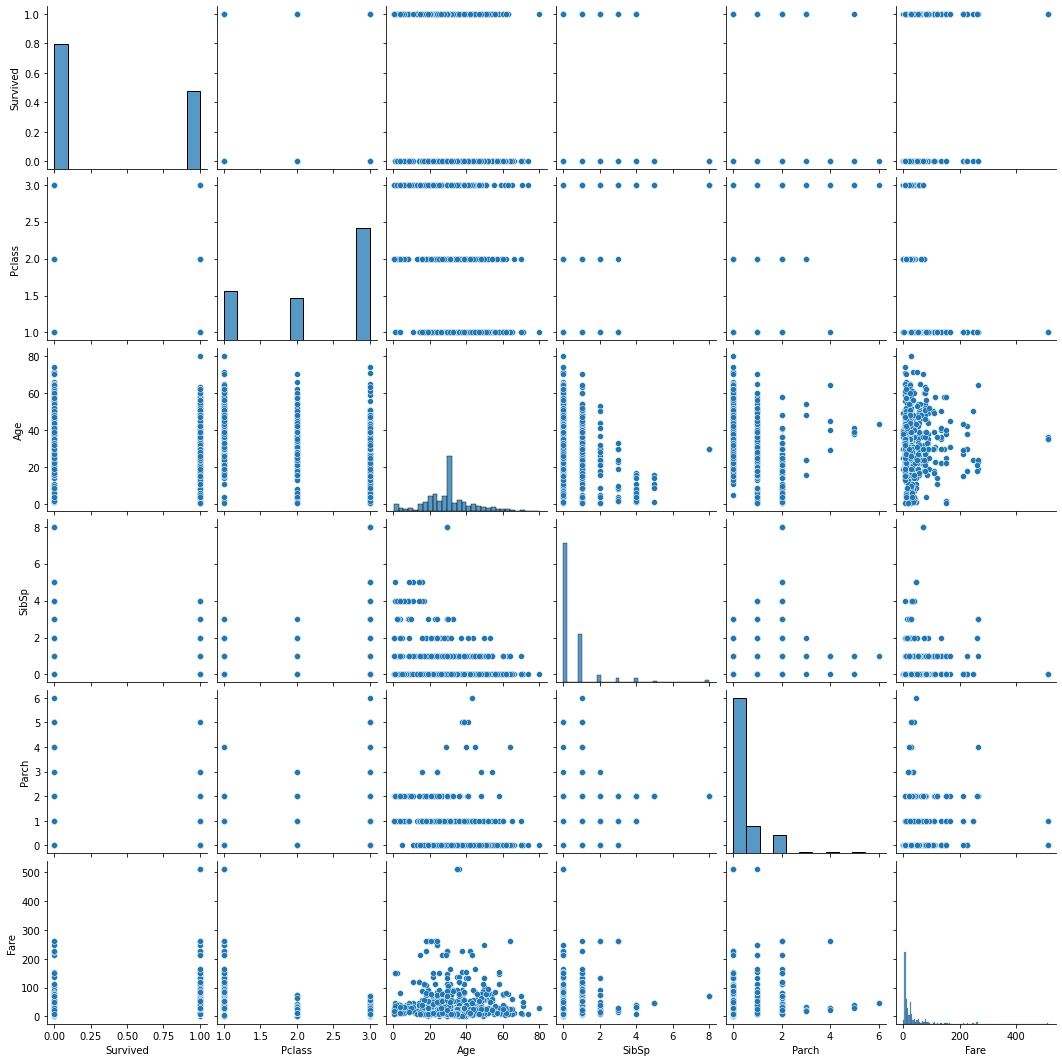

In [17]:
sns.pairplot(data);

## HEATMAP (CORRELATION MATRIX)
Heatmap grafiğimiz ile değişkenlerin arasında ilişkinin nasıl olduğuna ve target değişkenim ile bağımsız değişkenlerim arasındaki ilişkiyi sayısal olarak çok net bir şekilde analiz ediyorum. Korelasyon analizi için bu grafiği kullanıyorum

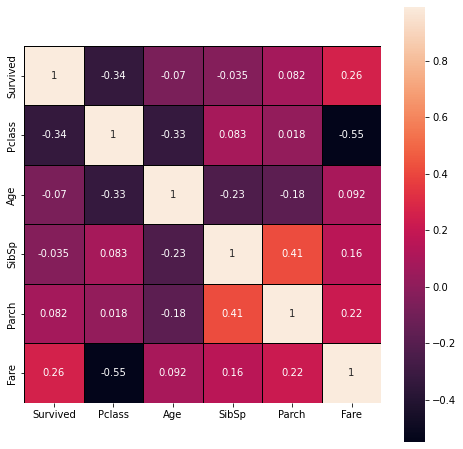

In [18]:
corrmax=data.corr()
plt.figure(figsize=(8, 8))
a=sns.heatmap(corrmax, vmax=.99, linewidths=0.5,square=True,annot=True,linecolor="black");

## COUNTPLOT
Şimdi de sıra sütun grafiği yani countplot, kategorik değişkenleri görselleştirmede kullanılır.
## CATPLOT 
Catplot grafiği sayesinde kind parametresinde istediğiniz count,bar violin, boxplot gibi grafik türlerini elde edebilirsiniz. Hadi kullanımınlarına bakalım...

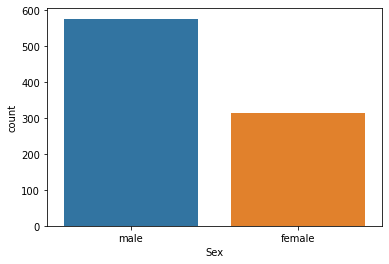

In [19]:
sns.countplot(x=data.Sex) #Erkeklerin kadınlardan daha fazla olduğunu analiz ediyoruz
plt.show()

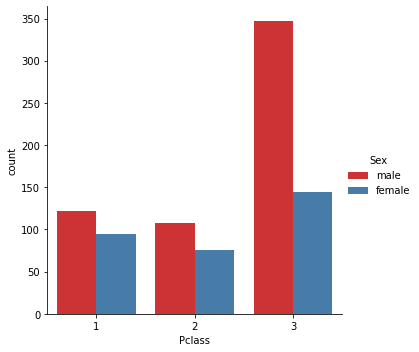

In [20]:
#CATPLOT İLE BAR GRAFİK ÇİZDİRME


sns.catplot(x="Pclass", kind="count", hue="Sex", palette="Set1", data=data);
#RdBu
#Greys_r
#YlGnBu_r
#Greens

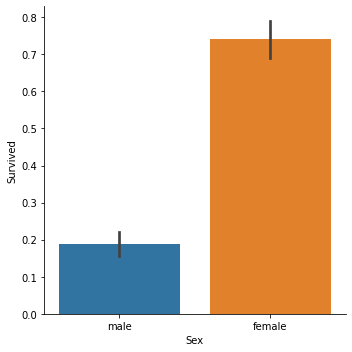

In [21]:
sns.catplot(y="Survived",x="Sex",data=data, kind="bar")

Boxplot grafiği ile de median, quartile değerlerine ulaşanilir. Outlierları belirlemek için kullanırız.

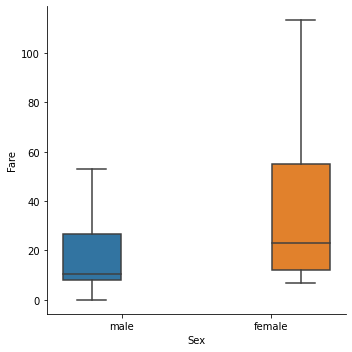

In [22]:
#BOXPlot ile değişkenlerin outlier, median ve mean değerlerine bakıp yorum yapabiliriz.
sns.catplot(y="Fare",x="Sex", data=data,kind="box" , hue="Sex", sym="")

**SCATTERPLOT**
Scatterplot ,iki farklı değişkenin arasındaki ilişkiyi belirlemek için kullanılır. Aralarındaki ilişkinin sebebi görülemese de, ilgili iki değişkenin arasında direkt olarak bir ilişki bulunup bulunmadığı ve bu ilişkinin ne derece güçlü olduğu konusunda da bize çok yardımcı olur.

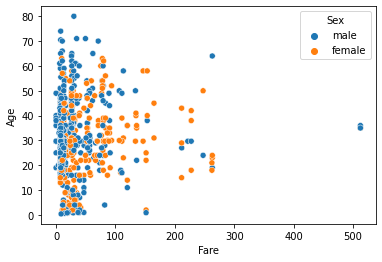

In [23]:
sns.scatterplot(x="Fare", y="Age", data=data, hue="Sex");

In [24]:
#görsellerimizi paper, talk veya poster olarak kaydedebiliyoruz.
sns.set_context("paper")
plt.show()